# Basic test for correlation

In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle as pkl
from tqdm import tqdm

from dataset.midi import process_midi_separating_instruments_mido

from ripdalib.utils.morphology import erosion, dilation
from ripdalib.variations.transform import list_to_matrix, matrix_to_list
from ripdalib.variations.plot import plot_matrix, plot_correlation
from ML.utils import correlation, my_dilatation

In [ ]:
data = process_midi_separating_instruments_mido("./bach_850.mid", 16)
length_subject = 12 #19 for 847, 13 for 846
quantization = 16 #8
fugua_names_list = ('Fuga1', 'Fuga2', 'Fuga3', 'Fuga4') #('Fuga 1', 'Fuga 2', 'Fuga 3', 'Fuga 4')
nbr_fugua_subject = 3 # 1 for 846 and 847
data.keys()

dict_keys(['midi_file', 'unbenannt'])

In [63]:
def basic_plot(tracks):
    plt.figure(figsize=(20, 10))
    for track in tracks.values():
        onsets = [elem[0] for elem in track]
        pitches = [elem[1] for elem in track]

        plt.scatter(onsets, pitches)

    plt.show()


def merge_instruments(tracks):
    merged = list()
    for name, track in tracks.items():
        if not name == "midi_file":
            merged.extend(track)
    merged = sorted(merged, key=lambda x: x[0])
    return merged

def settable(list_list):
    return [(elem[0], elem[1]) for elem in list_list]

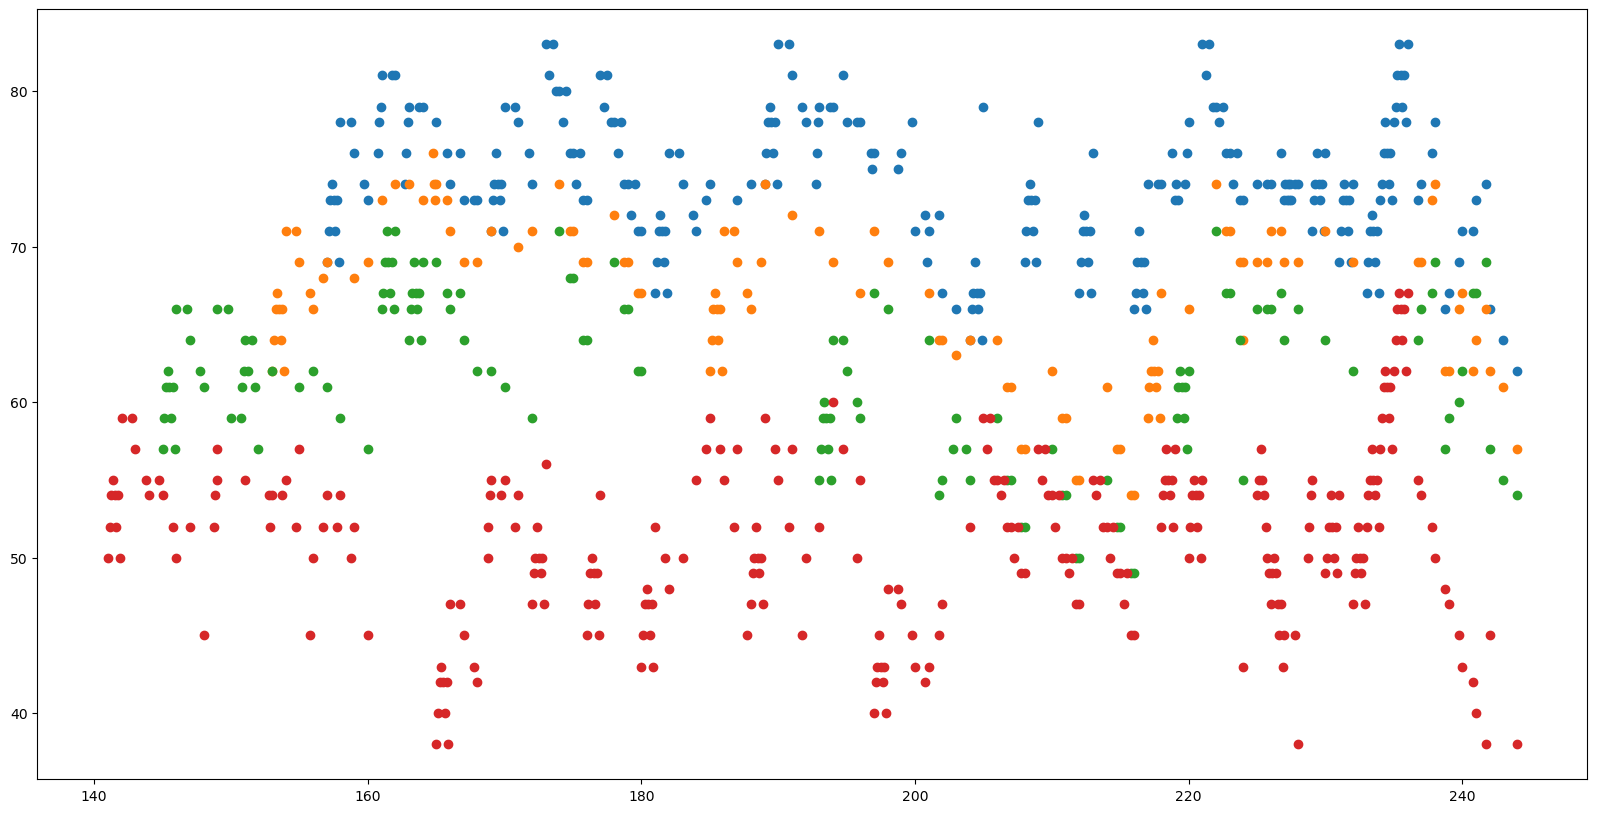

In [64]:
tracks = {key: data[key] for key in fugua_names_list}
basic_plot(tracks)

In [67]:
subject = data[fugua_names_list[nbr_fugua_subject]][:length_subject]

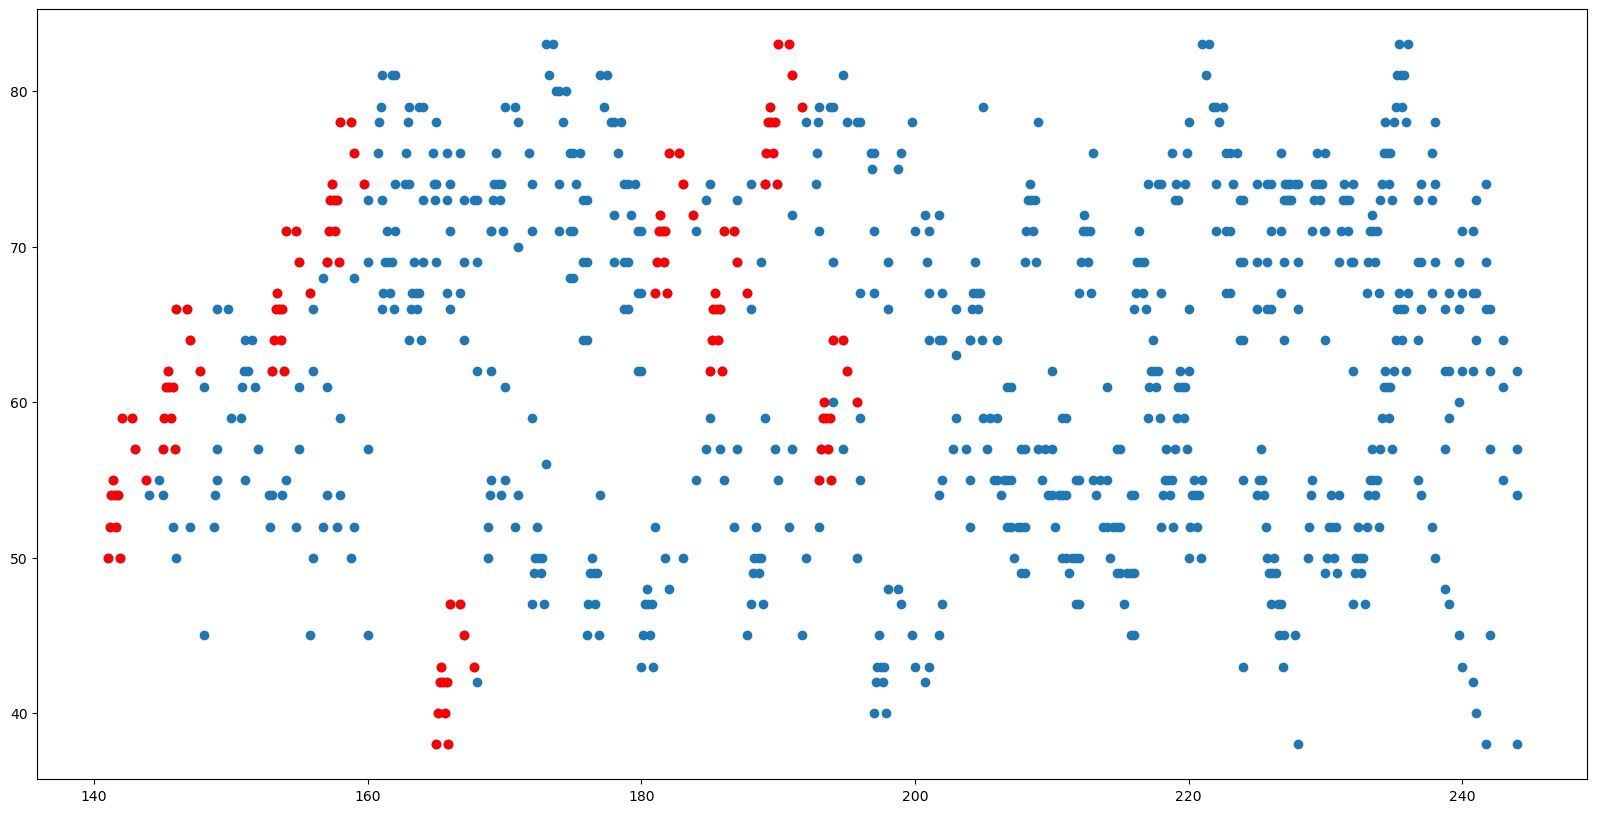

In [68]:
fugua = merge_instruments(tracks)
fugua = settable(fugua)
subject = settable(subject)

subject_onsets = erosion(fugua, subject)
subject_all = dilation(subject_onsets, subject)

plt.figure(figsize=(20, 10))
plt.scatter(*zip(*fugua))
plt.scatter(*zip(*subject_all), color='red')
plt.show()

## Correlation map

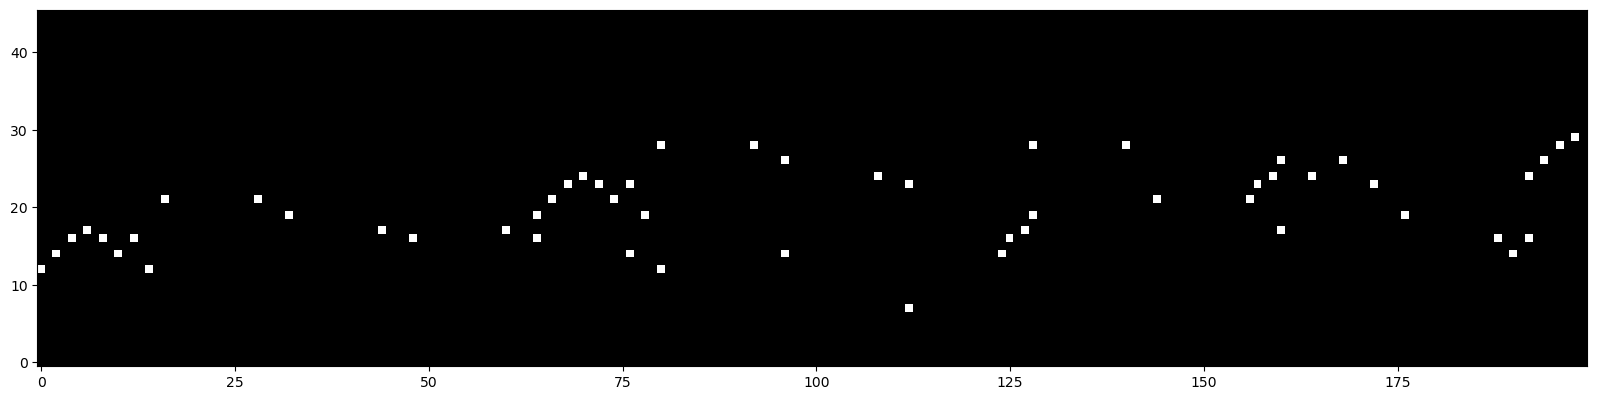

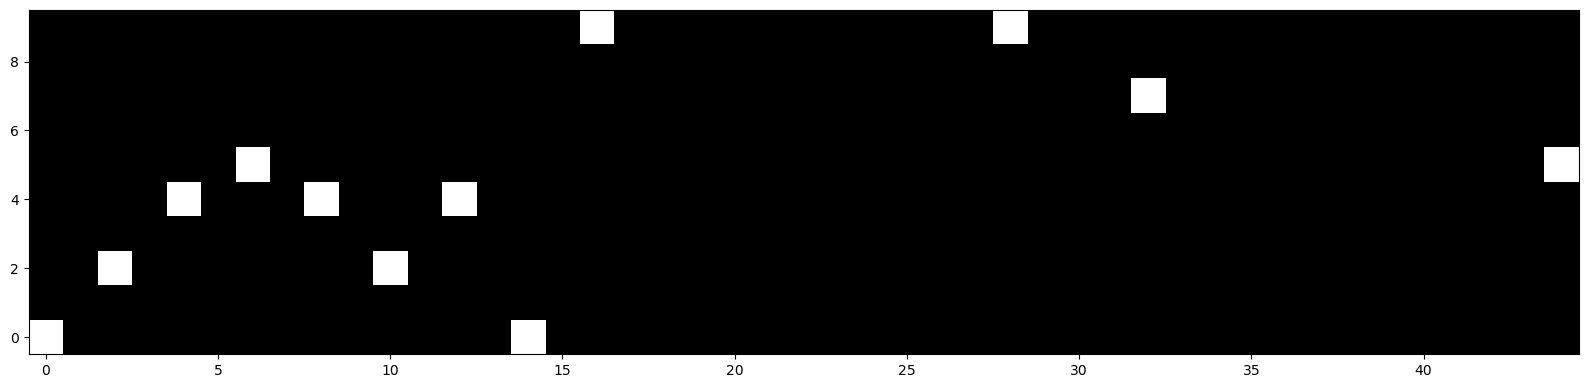

In [69]:
fugua_image = list_to_matrix(fugua, quantization)
subject_image = list_to_matrix(subject, quantization)

plot_matrix(fugua_image[:200])
plot_matrix(subject_image)

In [70]:
map = correlation(fugua_image, subject_image).squeeze((0, 1))

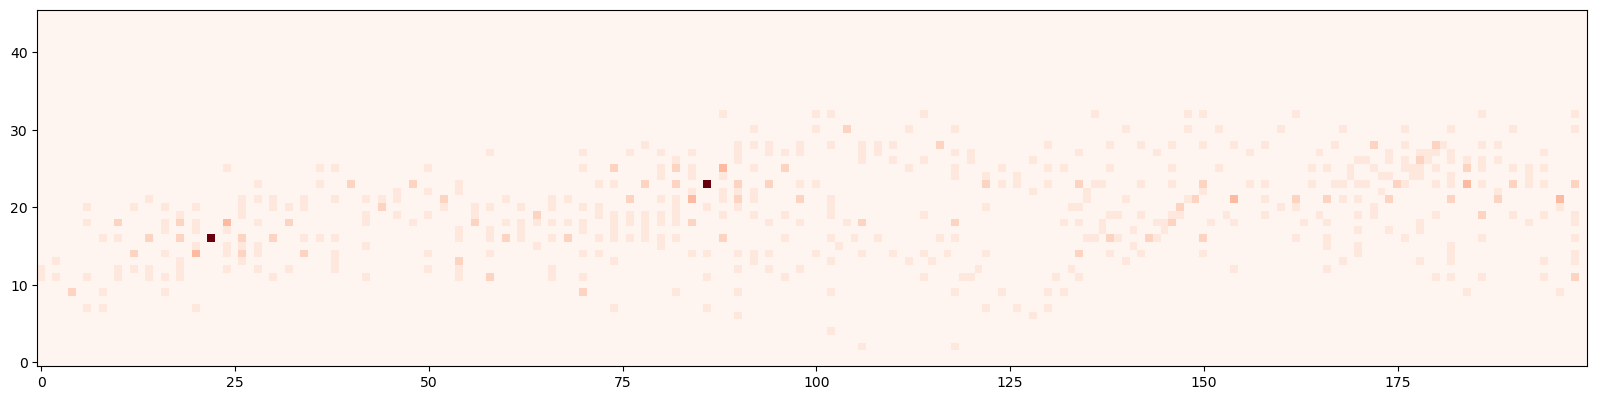

In [71]:
plot_correlation(map[:200])

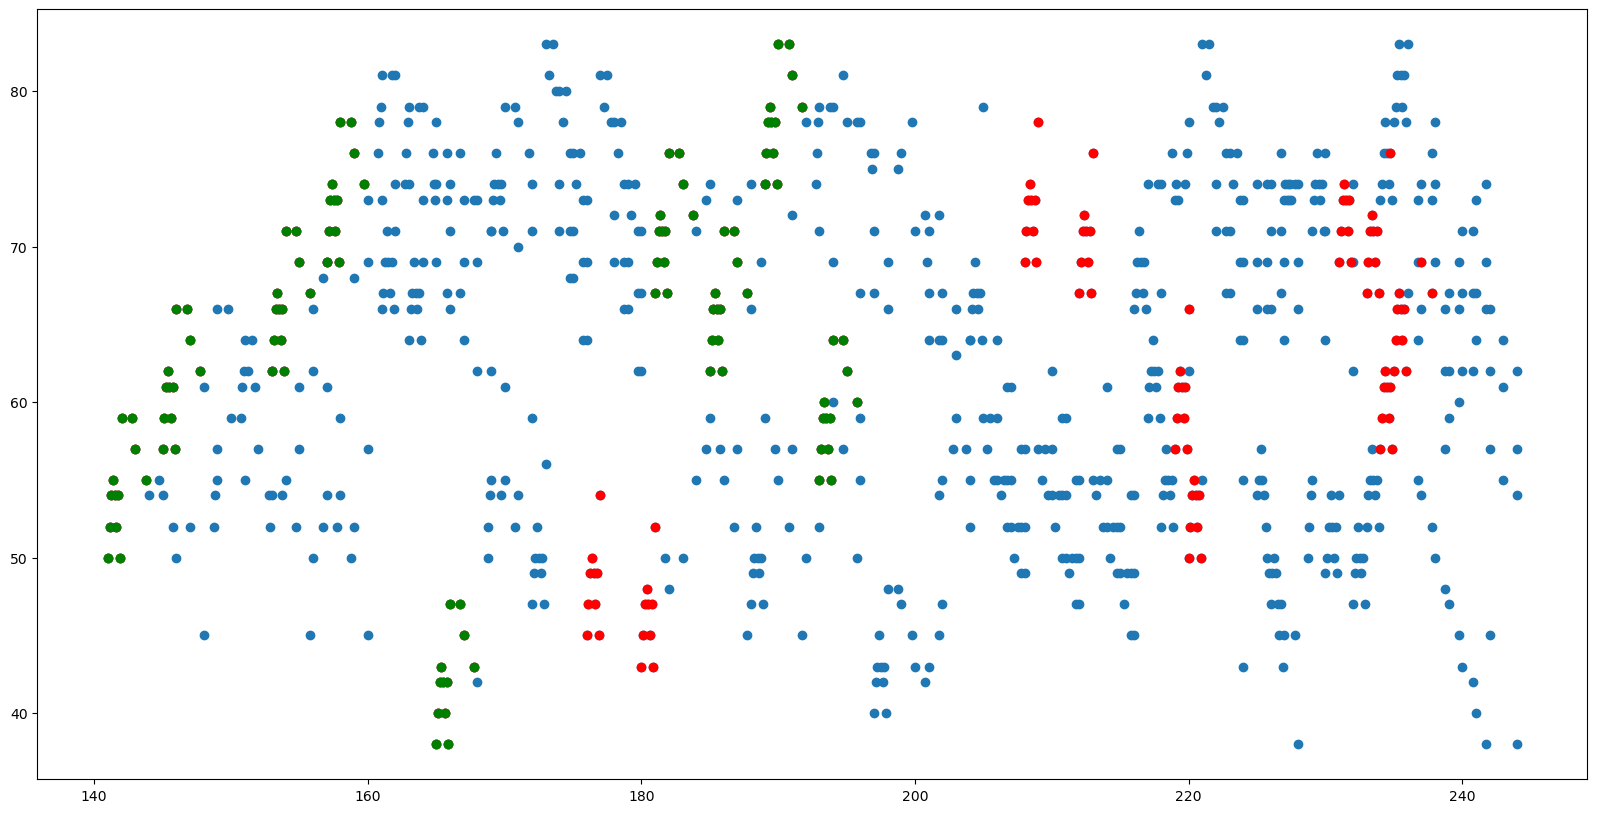

In [ ]:
new_patterns = my_dilatation(map>=0.6, subject_image).squeeze((0, 1)) * fugua_image

new_patterns_list = matrix_to_list(new_patterns, mindiv=quantization)

translations = fugua[np.argmin([fugua[i][0] for i in range(len(fugua))])]
translations = [translations[0], translations[1] - new_patterns_list[0][1]]

new_patterns_list = [(note[0] +translations[0], note[1] + translations[1]) for note in new_patterns_list]



plt.figure(figsize=(20, 10))
plt.scatter(*zip(*fugua))
plt.scatter(*zip(*new_patterns_list), color='red')
plt.scatter(*zip(*subject_all), color='green')
plt.show()

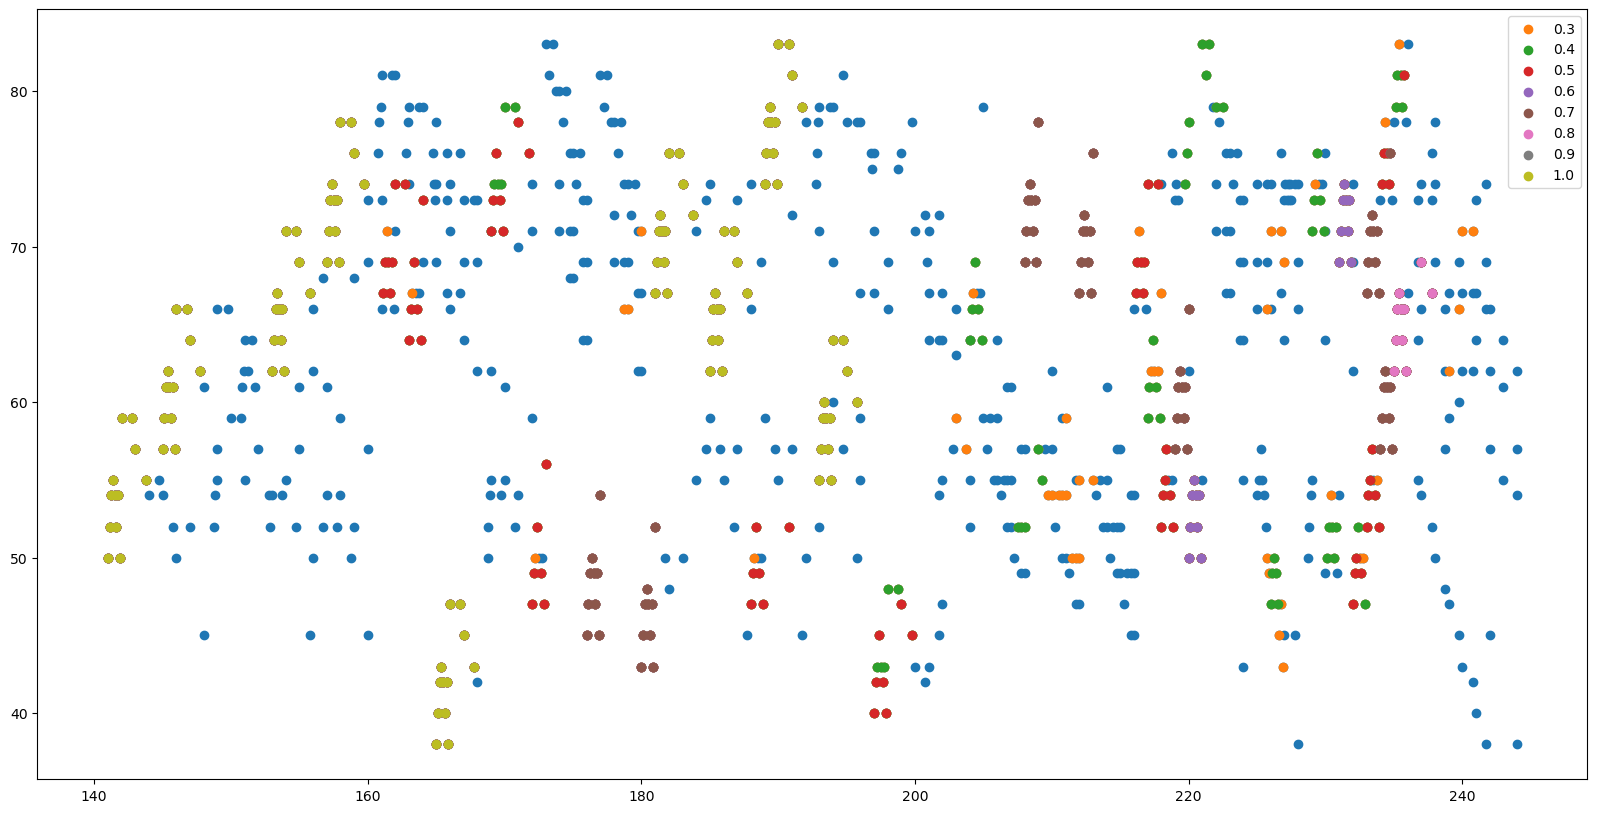

In [75]:
plt.figure(figsize=(20, 10))
plt.scatter(*zip(*fugua))

for prop in range(3,11,1):
    new_patterns = my_dilatation(map>=prop/10, subject_image).squeeze((0, 1)) * fugua_image
    new_patterns_list = matrix_to_list(new_patterns, mindiv=quantization)

    translations = fugua[np.argmin([fugua[i][0] for i in range(len(fugua))])]
    translations = [translations[0], translations[1] - new_patterns_list[0][1]]

    new_patterns_list = [(note[0] +translations[0], note[1] + translations[1]) for note in new_patterns_list]

    plt.scatter(*zip(*new_patterns_list), label=str(prop/10))

plt.legend()
plt.show()

## FOR 861

In [77]:
data = process_midi_separating_instruments_mido("./bach_861.mid", 16)
length_subject = 10
quantization = 16
data.keys()

dict_keys(['midi_file', 'unbenannt'])

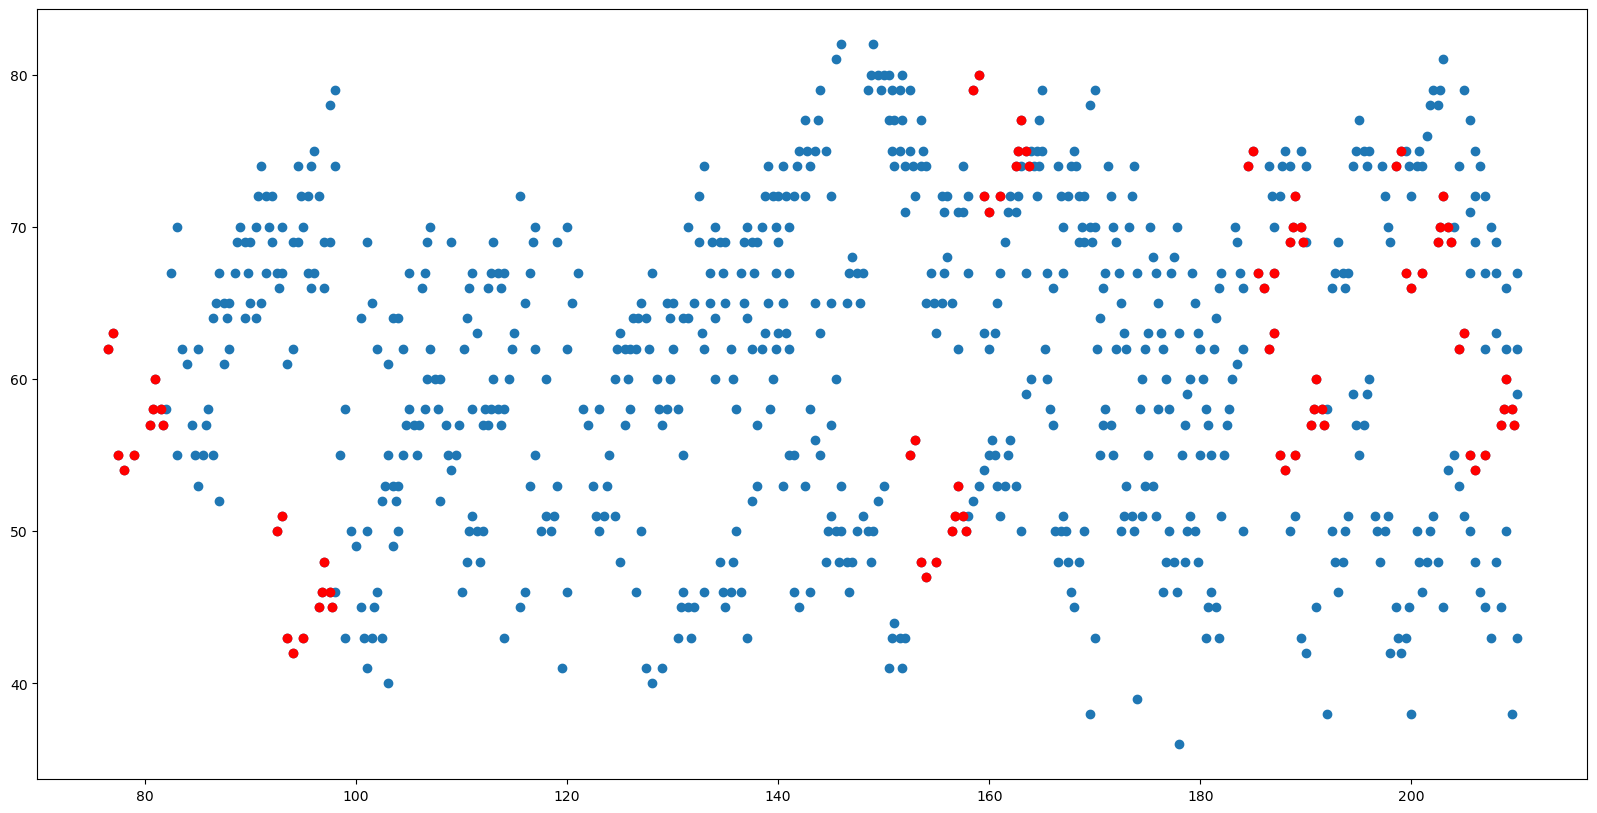

In [ ]:
fugua = data["unbenannt"]
fugua = [note for note in fugua if note[0] > 19 * 4] #remove the prelude (19 bars in 4/4)
fugua = settable(fugua)
subject = fugua[:length_subject]
subject = settable(subject)

subject_onsets = erosion(fugua, subject)
subject_all = dilation(subject_onsets, subject)

plt.figure(figsize=(20, 10))
plt.scatter(*zip(*fugua))
plt.scatter(*zip(*subject_all), color='red')
plt.show()

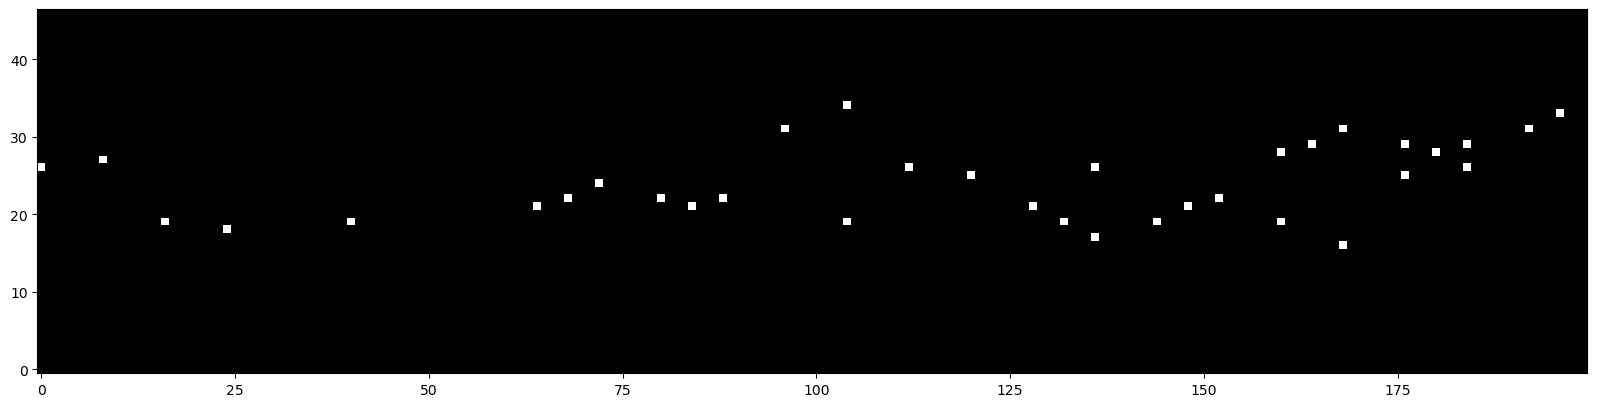

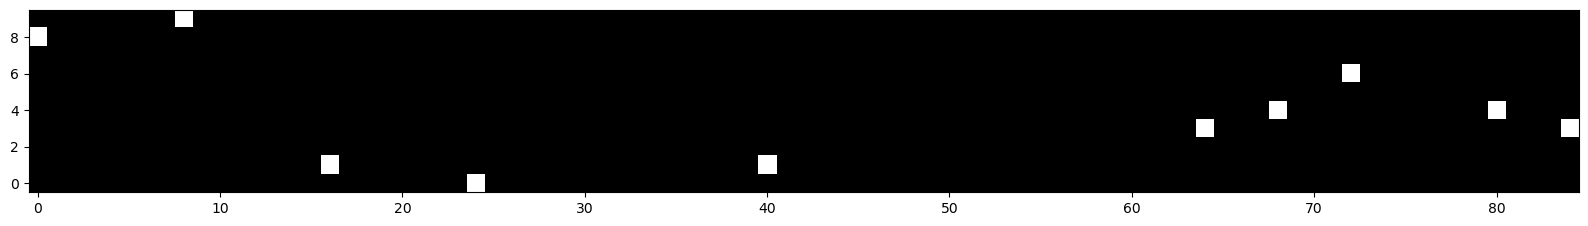

In [82]:
fugua_image = list_to_matrix(fugua, quantization)
subject_image = list_to_matrix(subject, quantization)

plot_matrix(fugua_image[:200])
plot_matrix(subject_image)

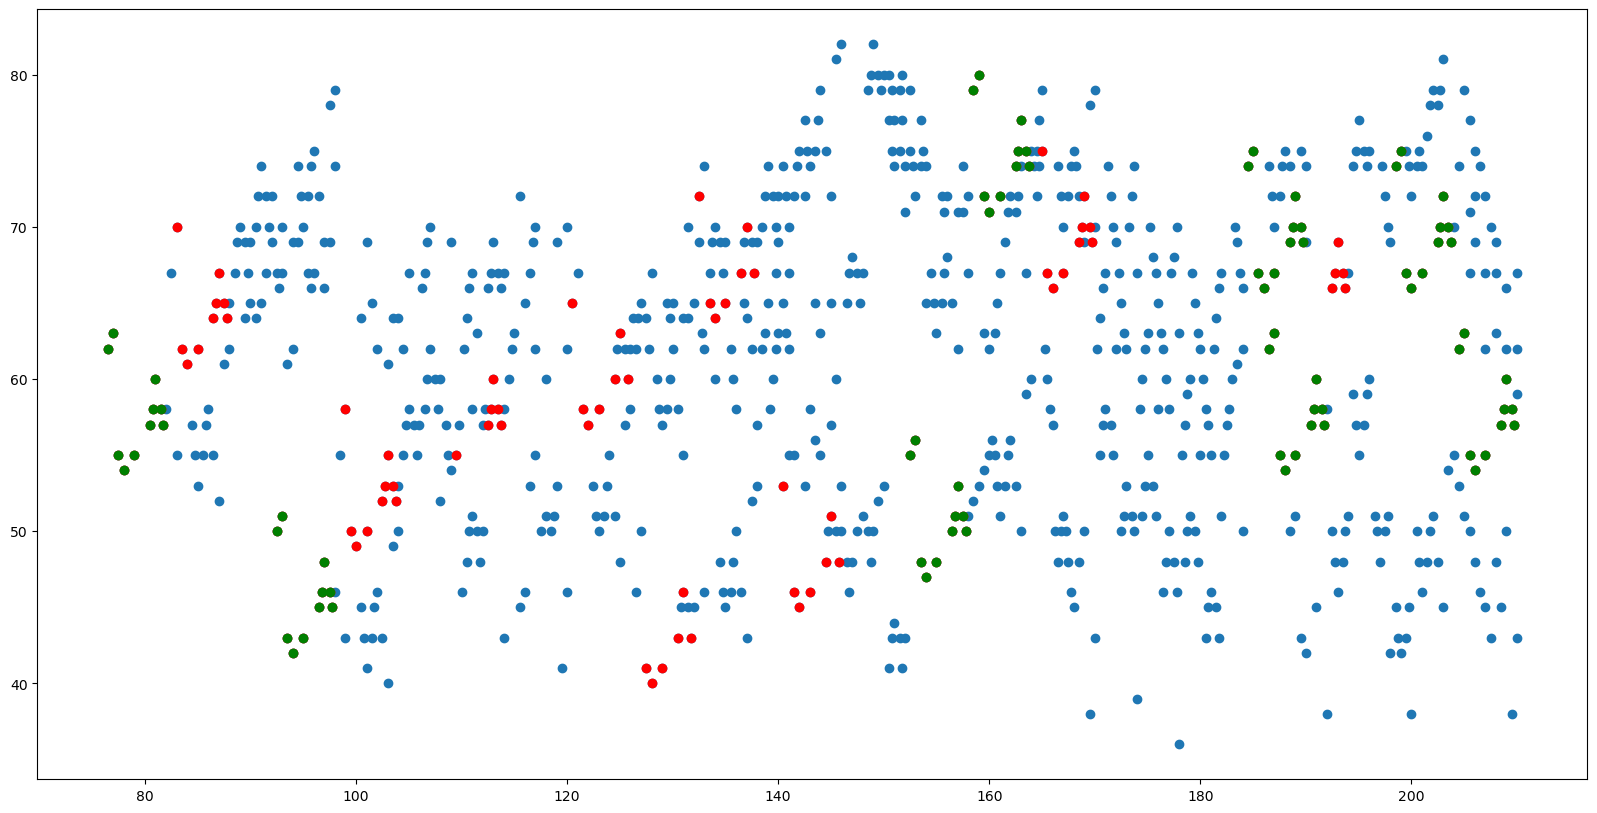

In [83]:
map = correlation(fugua_image, subject_image).squeeze((0, 1))

new_patterns = my_dilatation(map>=0.6, subject_image).squeeze((0, 1)) * fugua_image

new_patterns_list = matrix_to_list(new_patterns, mindiv=quantization)

translations = fugua[np.argmin([fugua[i][0] for i in range(len(fugua))])]
translations = [translations[0], translations[1] - new_patterns_list[0][1]]

new_patterns_list = [(note[0] +translations[0], note[1] + translations[1]) for note in new_patterns_list]



plt.figure(figsize=(20, 10))
plt.scatter(*zip(*fugua))
plt.scatter(*zip(*new_patterns_list), color='red')
plt.scatter(*zip(*subject_all), color='green')
plt.show()

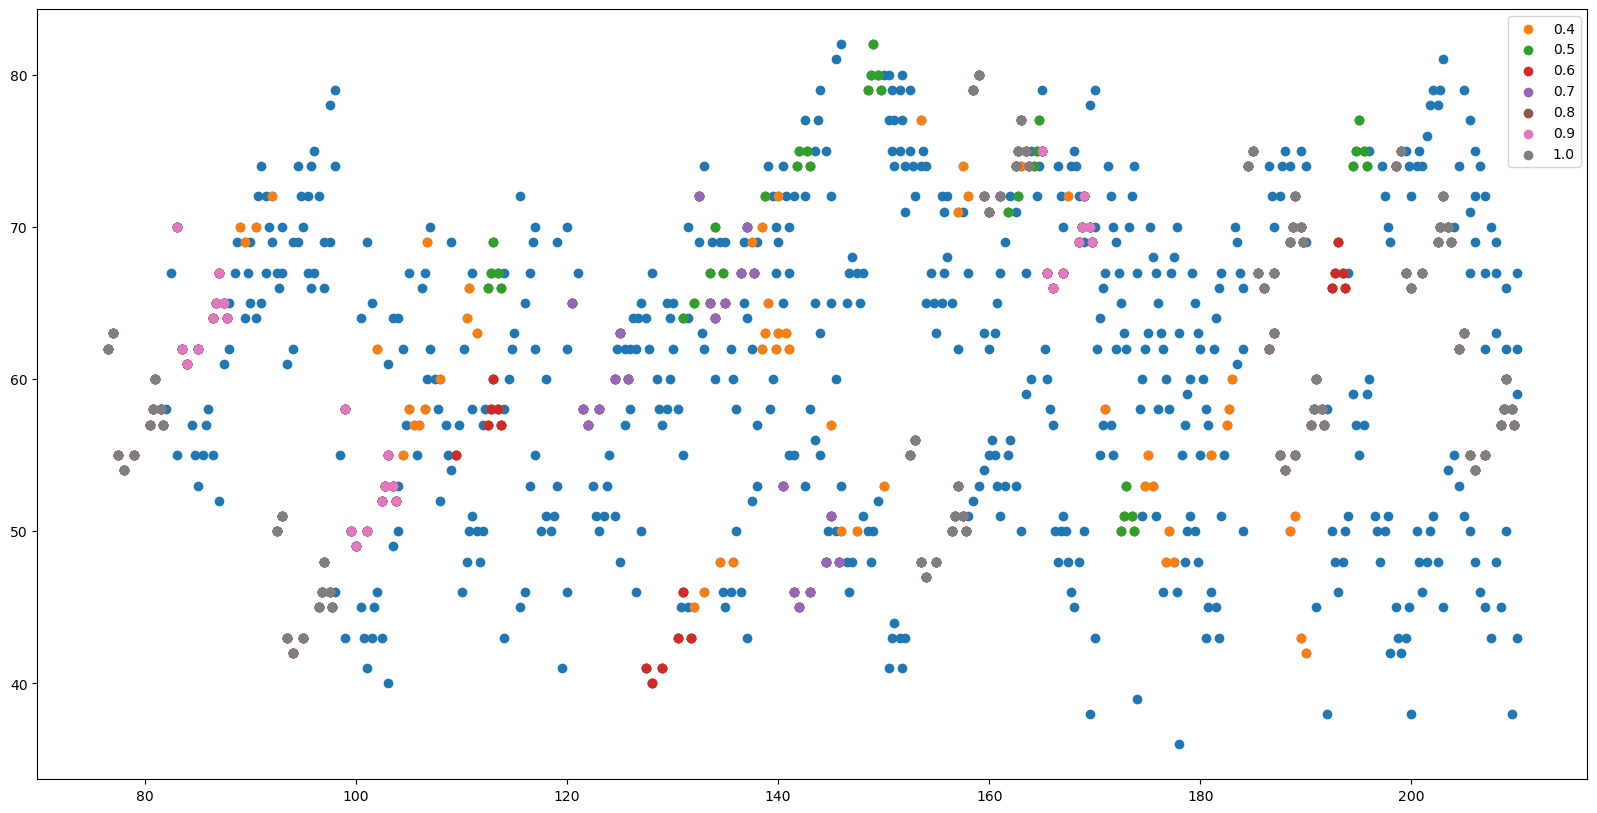

In [88]:
plt.figure(figsize=(20, 10))
plt.scatter(*zip(*fugua))

for prop in range(4,11):
    new_patterns = my_dilatation(map>=prop/10, subject_image).squeeze((0, 1)) * fugua_image
    new_patterns_list = matrix_to_list(new_patterns, mindiv=quantization)

    translations = fugua[np.argmin([fugua[i][0] for i in range(len(fugua))])]
    translations = [translations[0], translations[1] - new_patterns_list[0][1]]

    new_patterns_list = [(note[0] +translations[0], note[1] + translations[1]) for note in new_patterns_list]

    plt.scatter(*zip(*new_patterns_list), label=str(prop/10))

plt.legend()
plt.show()